In [1]:
!pip install scikit-learn==1.1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.1 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.1 which is incompatible.


In [11]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
from matplotlib import font_manager as fm

# 加載中文字體
font_path = "TaipeiSansTCBeta-Regular.ttf"
font = fm.FontProperties(fname=font_path)

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-11-27 14:49:12--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.20.100, 74.125.20.113, 74.125.20.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-11-27 14:49:12--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-11-27 14:49:16

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

截距为: 54.10195547054879
系数为: [-0.82484881 -1.15051635  0.00907876]


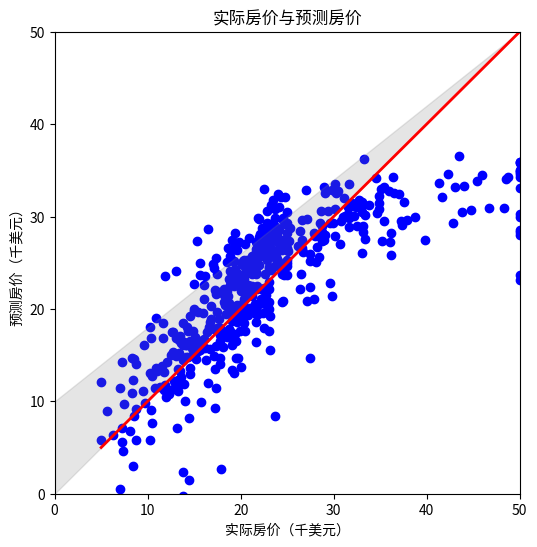

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

plt.rcParams['axes.unicode_minus'] = False

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

X = boston_df[['LSTAT', 'PTRATIO', 'INDUS']]
y = boston_df['MEDV']

model = LinearRegression()
model.fit(X, y)

print('截距为:', model.intercept_)
print('系数为:', model.coef_)

plt.figure(figsize=(6,6))
plt.scatter(y, model.predict(X), color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', linewidth=2)
plt.fill_between([0,50], [0,50], [10,50], color='gray', alpha=0.2)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.xlabel('实际房价（千美元）')
plt.ylabel('预测房价（千美元）')
plt.title('实际房价与预测房价')
plt.show()


截距为: 3.759264366561599
系数为: [ -0.3884832   -0.82639908  11.96403178  11.20449196   9.07020864
 -20.10614364 -10.15510106   8.70110596]


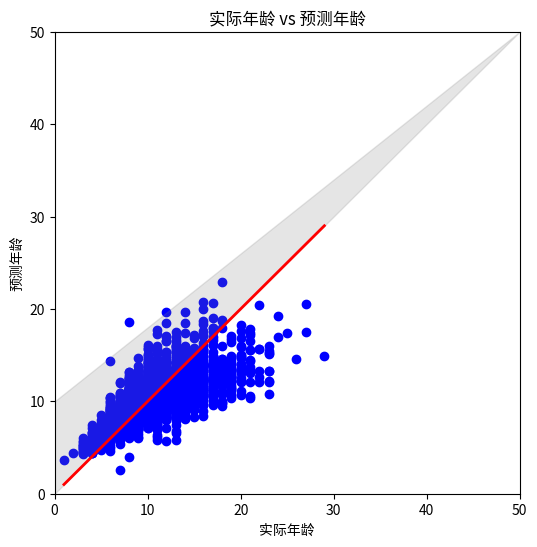

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

plt.rcParams['axes.unicode_minus'] = False

# Load Abalone dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv(url, names=column_names)
abalone_data['Sex'] = abalone_data['Sex'].map({'M': 0, 'F': 1, 'I': 2})

X = abalone_data.drop('Rings', axis=1)
y = abalone_data['Rings']

model = LinearRegression()
model.fit(X, y)

print('截距为:', model.intercept_)
print('系数为:', model.coef_)

plt.figure(figsize=(6,6))
plt.scatter(y, model.predict(X), color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', linewidth=2)
plt.fill_between([0,50], [0,50], [10,50], color='gray', alpha=0.2)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.xlabel('实际年龄')
plt.ylabel('预测年龄')
plt.title('实际年龄 vs 预测年龄')
plt.show()


MSE: 4.474645720397838
R2: 0.5866458293588366


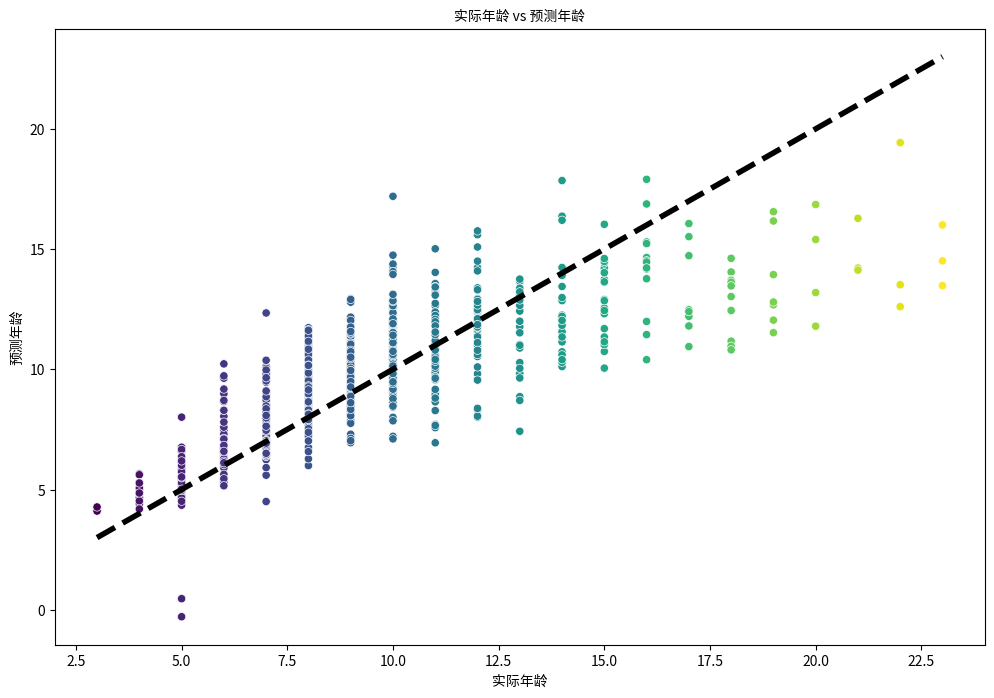

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load Abalone dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv(url, names=column_names)
abalone_data['Sex'] = abalone_data['Sex'].map({'M': 0, 'F': 1, 'I': 2})

X = abalone_data.drop('Rings', axis=1)
y = abalone_data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
regressor = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette='viridis', legend=None, ax=ax)
ax.set_xlabel('实际年龄', fontproperties=font)
ax.set_ylabel('预测年龄', fontproperties=font)
ax.set_title('实际年龄 vs 预测年龄', fontproperties=font)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

MSE: 47.84919432917978
R2: 0.3475149887662081


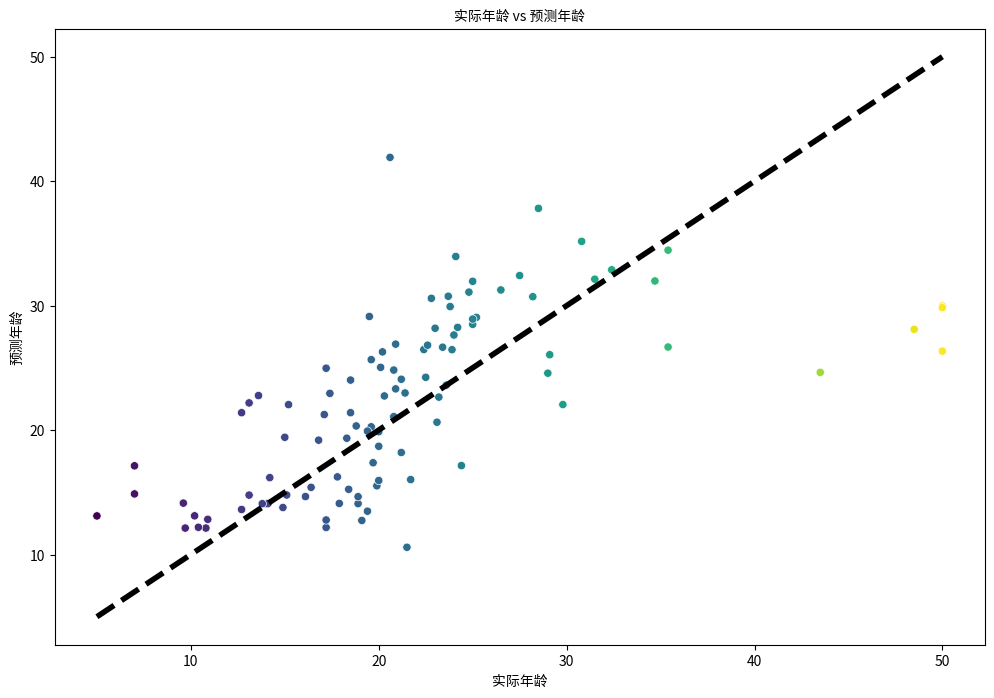

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

X = boston_df[['LSTAT', 'PTRATIO', 'INDUS']]
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
regressor = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette='viridis', legend=None, ax=ax)
ax.set_xlabel('实际年龄', fontproperties=font)
ax.set_ylabel('预测年龄', fontproperties=font)
ax.set_title('实际年龄 vs 预测年龄', fontproperties=font)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()
